In [261]:
import numpy
import rioxarray
import matplotlib.pyplot as plt

In [262]:
lst = rioxarray.open_rasterio("/Users/angelacai/TKI/Standardized Uganda/standard_uganda_LSTday_2km_2018.tif")
rainfall = rioxarray.open_rasterio("/Users/angelacai/TKI/Standardized Uganda/standard_uganda_Rainfall_CHIRPS_2km_2018.tif")
elevation = rioxarray.open_rasterio("/Users/angelacai/TKI/Standardized Uganda/standard_uganda_elevation.tif")


In [263]:
lst_values = lst.to_numpy().flatten()
rainfall_values = rainfall.to_numpy().flatten()
elevation_values = elevation.to_numpy().flatten()

In [264]:
covariates = numpy.vstack((lst_values, rainfall_values, elevation_values))

In [265]:
correlation_matrix = numpy.corrcoef(covariates)
pretty_correlation_matrix = numpy.absolute(numpy.rot90(correlation_matrix))

In [266]:
print(correlation_matrix)
print(pretty_correlation_matrix)

[[ 1.         -0.43596686 -0.25873025]
 [-0.43596686  1.          0.22827306]
 [-0.25873025  0.22827306  1.        ]]
[[0.25873025 0.22827306 1.        ]
 [0.43596686 1.         0.22827306]
 [1.         0.43596686 0.25873025]]


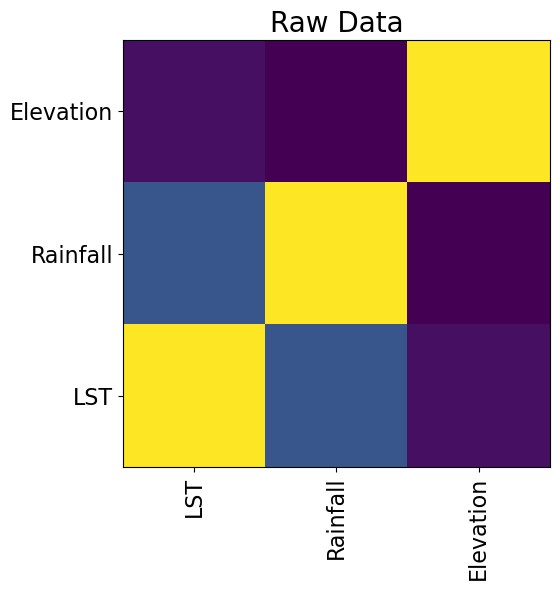

In [267]:
# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.matshow(pretty_correlation_matrix, cmap="viridis")
ax.set_xticks([0, 1, 2])
ax.set_yticks([0, 1, 2])
ax.set_xticklabels(["LST", "Rainfall", "Elevation"], rotation=90, fontsize=16)
ax.set_yticklabels(["Elevation", "Rainfall", "LST"], fontsize=16)
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_label_position('bottom')
plt.title('Raw Data', fontsize=20)
plt.tight_layout()
plt.savefig("/Users/angelacai/TKI/Uganda Malaria/raw_covariates_correlation_uganda_2km_2018.png") 
plt.show()